# Modelos
En este notebook definimos e implementamos los modelos. Serán 4 modelos en total usando diferentes técnicas

In [ ]:
from sklearn.metrics import *
import numpy as np
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn.init as init
import importlib
import data
import agente_cnn
import torch
import torch.nn as nn
import torch.nn.functional as F
from itertools import islice
import agente_knn
from torch.utils.data import Subset
import agente_mlp
from sklearn.neighbors import KNeighborsClassifier
importlib.reload(data)
importlib.reload(agente_cnn)
importlib.reload(agente_knn)
importlib.reload(agente_mlp)

<module 'agente_mlp' from 'd:\\Universidad\\Aprendizaje-Automatico-y-Big-Data\\Practica5\\agente_mlp.py'>

In [2]:
path = "./UTKFace"

GENERO = ('Hombre','Mujer')
RAZA = ('Blanco','Negro','Asiático','Indio','Otros')
EDADES = ('0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99','100-109','110-120')

# Modelo 1: KNN-Almeida


In [3]:
# Adaptamos las imagenes a un dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
dataset = data.Dataset(path, transform=transform,target_transform=data.clasificarEdad)  # Pasamos las imagenes a la estructura de datos
train_dataloader, test_dataloader = data.entrenamientoTest(dataset=dataset, test_size=0.2, batch_size=1)

- Género 

Vamos a calcular, empiricamente, el mejor numero K de vecinos para el modelo. Esto lo conseguimos haciendo cross validation; sin embargo, no lo vamos a hacer todo el conjunto de entrenamientos sino sobre 1000 imagenes debido a que la librería de scikit learn es un poco ineficiente y requiere cargar muchos datos en memoria RAM

k=1 -> Puntuación media de la validación cruzada: 0.642
k=2 -> Puntuación media de la validación cruzada: 0.6700000000000002
k=3 -> Puntuación media de la validación cruzada: 0.6799999999999999
k=4 -> Puntuación media de la validación cruzada: 0.687
k=5 -> Puntuación media de la validación cruzada: 0.685
k=6 -> Puntuación media de la validación cruzada: 0.6849999999999999
k=7 -> Puntuación media de la validación cruzada: 0.686
k=8 -> Puntuación media de la validación cruzada: 0.691
k=9 -> Puntuación media de la validación cruzada: 0.6950000000000001
k=10 -> Puntuación media de la validación cruzada: 0.693
k=11 -> Puntuación media de la validación cruzada: 0.6910000000000001
k=12 -> Puntuación media de la validación cruzada: 0.688
k=13 -> Puntuación media de la validación cruzada: 0.695
k=14 -> Puntuación media de la validación cruzada: 0.6900000000000001
k=15 -> Puntuación media de la validación cruzada: 0.6860000000000002
k=16 -> Puntuación media de la validación cruzada: 0.694
k=17 -

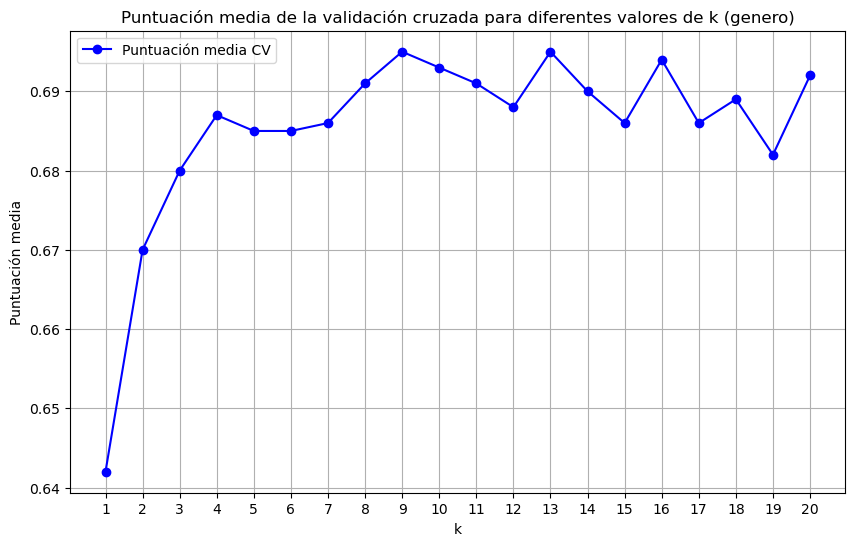

In [16]:
k_genero , _ = agente_knn.encontrar_mejor_k(train_dataloader, categoria= 'genero',num_imagenes=1000, k_range=range(1, 21))

Como ya hemos mencionado, vamos a usar las librerías de Scikit-Learn y  necesitamos cargar en memoria las imagenes.

In [4]:
X_train , Y_train = data.cargarDatos(train_dataloader,num_imagenes= len(train_dataloader),categoria = "genero")

In [5]:
AlmeidaGenero = KNeighborsClassifier(n_neighbors=9)
AlmeidaGenero.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=9)

- Edad

Calculamos el mejor K:

k=1 -> Puntuación media de la validación cruzada: 0.26399999999999996
k=2 -> Puntuación media de la validación cruzada: 0.28900000000000003
k=3 -> Puntuación media de la validación cruzada: 0.285
k=4 -> Puntuación media de la validación cruzada: 0.28200000000000003
k=5 -> Puntuación media de la validación cruzada: 0.30500000000000005
k=6 -> Puntuación media de la validación cruzada: 0.309
k=7 -> Puntuación media de la validación cruzada: 0.31
k=8 -> Puntuación media de la validación cruzada: 0.31799999999999995
k=9 -> Puntuación media de la validación cruzada: 0.313
k=10 -> Puntuación media de la validación cruzada: 0.333
k=11 -> Puntuación media de la validación cruzada: 0.328
k=12 -> Puntuación media de la validación cruzada: 0.335
k=13 -> Puntuación media de la validación cruzada: 0.33499999999999996
k=14 -> Puntuación media de la validación cruzada: 0.32999999999999996
k=15 -> Puntuación media de la validación cruzada: 0.339
k=16 -> Puntuación media de la validación cruzada: 0.3339

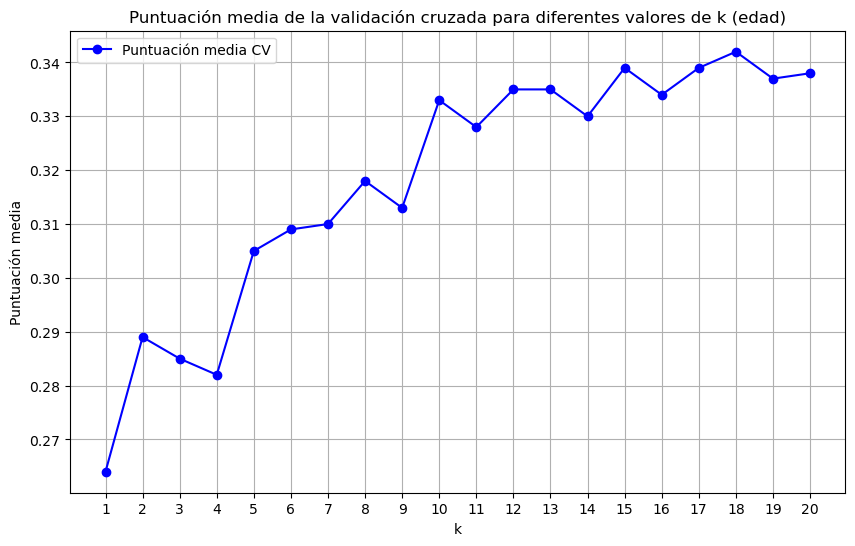

In [ ]:
k_edad , _ = agente_knn.encontrar_mejor_k(train_dataloader, categoria= 'edad',num_imagenes=1000, k_range=range(1, 21))

In [6]:
X_train , Y_train = data.cargarDatos(train_dataloader,num_imagenes= len(train_dataloader),categoria = "edad")

In [7]:
AlmeidaEdad = KNeighborsClassifier(n_neighbors=18)
AlmeidaEdad.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=18)

- Raza


k=1 -> Puntuación media de la validación cruzada: 0.41900000000000004
k=2 -> Puntuación media de la validación cruzada: 0.462
k=3 -> Puntuación media de la validación cruzada: 0.462
k=4 -> Puntuación media de la validación cruzada: 0.48199999999999993
k=5 -> Puntuación media de la validación cruzada: 0.499
k=6 -> Puntuación media de la validación cruzada: 0.503
k=7 -> Puntuación media de la validación cruzada: 0.507
k=8 -> Puntuación media de la validación cruzada: 0.495
k=9 -> Puntuación media de la validación cruzada: 0.49400000000000005
k=10 -> Puntuación media de la validación cruzada: 0.5010000000000001
k=11 -> Puntuación media de la validación cruzada: 0.49800000000000005
k=12 -> Puntuación media de la validación cruzada: 0.496
k=13 -> Puntuación media de la validación cruzada: 0.495
k=14 -> Puntuación media de la validación cruzada: 0.49800000000000005
k=15 -> Puntuación media de la validación cruzada: 0.5
k=16 -> Puntuación media de la validación cruzada: 0.49700000000000005
k=

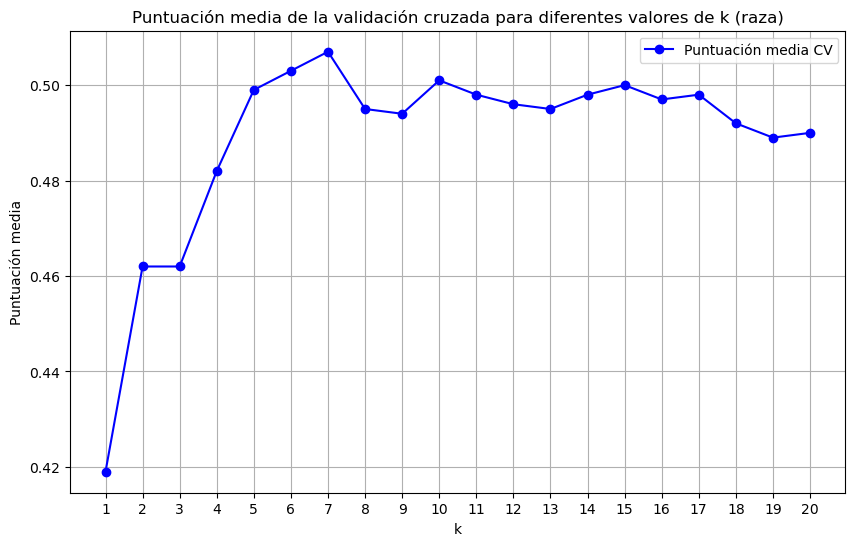

In [63]:
k_raza , _ = agente_knn.encontrar_mejor_k(train_dataloader, categoria= 'raza',num_imagenes=1000, k_range=range(1, 21))

In [8]:
AlmeidaRaza = KNeighborsClassifier(n_neighbors=7)

X_train , Y_train = data.cargarDatos(train_dataloader,num_imagenes= len(train_dataloader),categoria = "raza")
AlmeidaRaza.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=7)

## Resultados KNN Almeida

Veamos como se comporta el modelo.Primero cargamos el conjunto de Test y luego calculamos las predicciones con los correspondientes modelos:

In [ ]:
#Cargar datos
X_test, Y_edades = data.cargarDatos(test_dataloader,num_imagenes= len(test_dataloader),categoria = "edad")
_, Y_generos = data.cargarDatos(test_dataloader,num_imagenes= len(test_dataloader),categoria = "genero")
_, Y_razas = data.cargarDatos(test_dataloader,num_imagenes= len(test_dataloader),categoria = "raza")

In [10]:
#Resultados
y_pred_edades = AlmeidaEdad.predict(X_test)
y_pred_generos = AlmeidaGenero.predict(X_test)
y_pred_razas = AlmeidaRaza.predict(X_test)

In [ ]:
metricasGenero = classification_report(Y_generos, y_pred_generos,target_names=GENERO)
metricasRaza = classification_report(Y_razas, y_pred_razas,target_names=RAZA)
metricasEdad = classification_report(Y_edades, y_pred_edades,target_names=EDADES)

- Genero

              precision    recall  f1-score   support

      Hombre       0.73      0.80      0.76      2483
       Mujer       0.75      0.68      0.71      2259

    accuracy                           0.74      4742
   macro avg       0.74      0.74      0.74      4742
weighted avg       0.74      0.74      0.74      4742



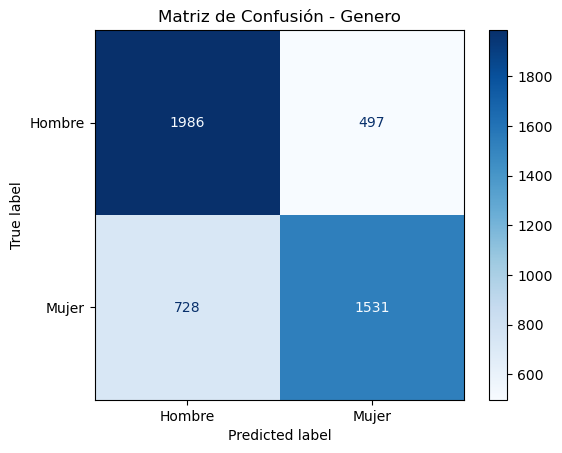

In [ ]:
print(metricasGenero)
matrizGenero = confusion_matrix(Y_generos, y_pred_generos)
disp = ConfusionMatrixDisplay(confusion_matrix=matrizGenero,display_labels = GENERO)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión - Genero")
plt.show()

- Raza

              precision    recall  f1-score   support

      Blanco       0.52      0.86      0.65      1969
       Negro       0.64      0.43      0.51       892
    Asiático       0.47      0.26      0.33       708
       Indio       0.49      0.26      0.34       835
       Otros       0.21      0.04      0.07       338

    accuracy                           0.52      4742
   macro avg       0.47      0.37      0.38      4742
weighted avg       0.51      0.52      0.48      4742



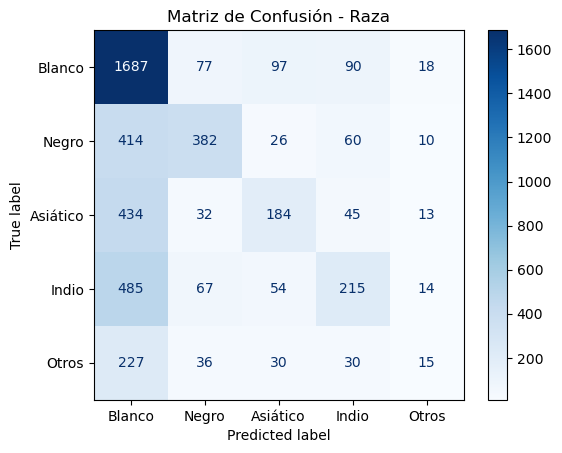

In [ ]:
print(metricasRaza)
matrizRaza = confusion_matrix(Y_razas, y_pred_razas)
disp = ConfusionMatrixDisplay(confusion_matrix=matrizRaza, display_labels=RAZA)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión - Raza")
plt.show()

- Edad

              precision    recall  f1-score   support

         0-9       0.57      0.73      0.64       601
       10-19       0.17      0.05      0.08       284
       20-29       0.44      0.65      0.53      1501
       30-39       0.24      0.25      0.25       888
       40-49       0.17      0.09      0.12       466
       50-59       0.22      0.19      0.21       471
       60-69       0.21      0.07      0.11       260
       70-79       0.11      0.01      0.03       137
       80-89       0.00      0.00      0.00       101
       90-99       0.00      0.00      0.00        30
     100-109       0.00      0.00      0.00         1
     110-120       0.00      0.00      0.00         2

    accuracy                           0.38      4742
   macro avg       0.18      0.17      0.16      4742
weighted avg       0.32      0.38      0.34      4742



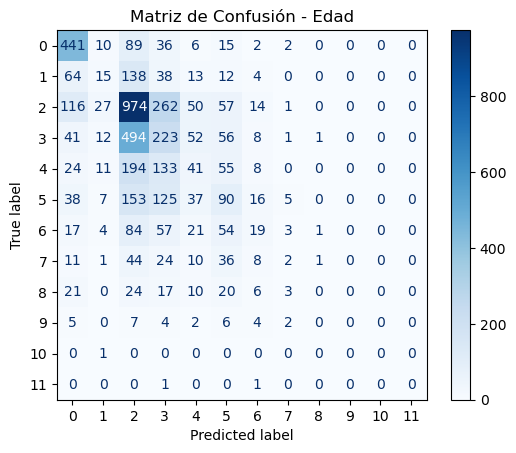

In [19]:
print(metricasEdad)
matrizEdad = confusion_matrix(Y_edades, y_pred_edades)
disp = ConfusionMatrixDisplay(confusion_matrix=matrizEdad,display_labels = ['0','1','2','3', '4','5','6','7','8','9','10','11'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión - Edad")
plt.show()

# Modelo 2: MLP-Napoleon

En este modelo vamos a implementar mediante Pytorch una red neuronal

In [15]:
class MLP(nn.Module):
    def __init__(self, input_size, num_classes):
        super(MLP, self).__init__()
        # Definir las capas del MLP
        self.fc1 = nn.Linear(input_size, 512)  # Capa de entrada -> 512 unidades
        self.fc2 = nn.Linear(512, 256)         # Capa oculta -> 256 unidades
        self.fc3 = nn.Linear(256, num_classes) # Capa de salida -> número de clases

    def forward(self, x):
        # Aplanar las imágenes de tamaño (batch_size, 3, 64, 64) a (batch_size, 12288)
        x = x.view(x.size(0), -1)  # Aplanar las imágenes a un vector 1D por imagen
        x = F.relu(self.fc1(x))    # Capa 1 -> ReLU
        x = F.relu(self.fc2(x))    # Capa 2 -> ReLU
        x = self.fc3(x)            # Capa 3 -> Salida
        return x

Para este modelo vamos a redimensionar las imagenes: de 200x200 a 64x64 pixeles

In [16]:
# Transformación que redimensiona las imágenes y las normaliza
transform = transforms.Compose([ 
    transforms.Resize((64, 64)),             # Redimensiona las imágenes a 64x64
    transforms.ToTensor(),                   # Convierte las imágenes a tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normaliza las imágenes
])

dataset = data.Dataset(path, transform=transform,target_transform=data.clasificarEdad)
train_dataloader,test_dataloader = data.entrenamientoTest(dataset=dataset,test_size=0.2,batch_size=4)

- Genero (20 epochs)

In [ ]:
NapoleonGenero = MLP(input_size=64*64*3, num_classes=2)
train_losses, train_accuracies, test_losses, test_accuracies = agente_mlp.train_and_evaluate(NapoleonGenero, train_dataloader, test_dataloader, etiqueta='genero', num_epochs=20)
torch.save(NapoleonGenero.state_dict(), './Modelos/NapoleonGenero.pth')

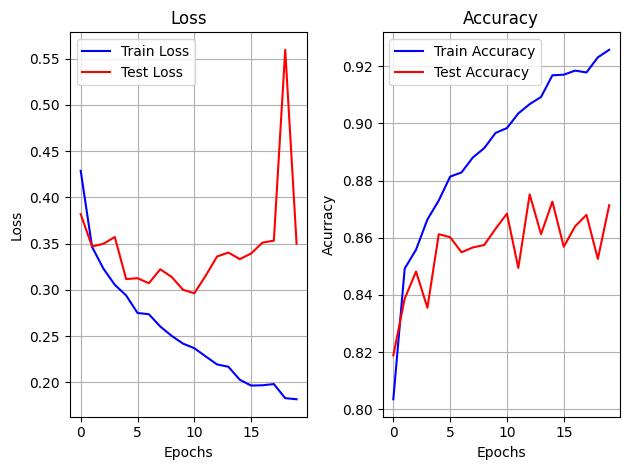

In [ ]:
data.graficaEntrenamiento(train_losses,train_accuracies,test_losses,test_accuracies,epochs=20,nombre="entrenamientoGenero")

In [38]:
NapoleonGenero = MLP(input_size=64*64*3, num_classes=2)
NapoleonGenero.load_state_dict(torch.load('./Modelos/NapoleonGenero.pth'))

<All keys matched successfully>

- Edad (20 epochs)

In [ ]:
NapoleonEdad = MLP(input_size=64*64*3, num_classes=10)
train_losses, train_accuracies, test_losses, test_accuracies = agente_mlp.train_and_evaluate(NapoleonEdad, train_dataloader, test_dataloader, etiqueta='edad', num_epochs=20)
torch.save(NapoleonGenero.state_dict(), './Modelos/NapoleonEdad.pth')

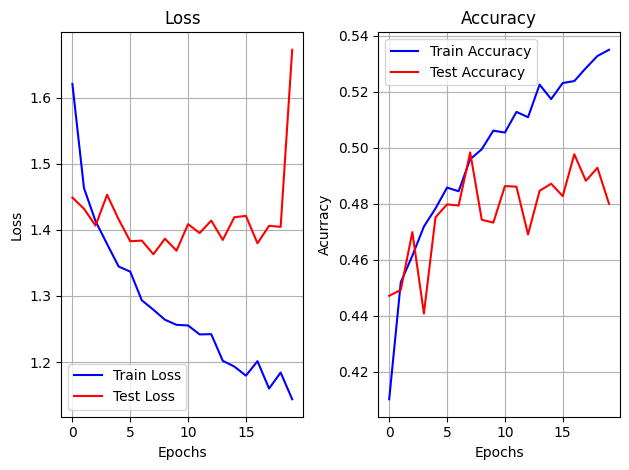

In [ ]:
data.graficaEntrenamiento(train_losses,train_accuracies,test_losses,test_accuracies,epochs=20,nombre="entrenamientoEdad")

In [25]:
NapoleonEdad = MLP(input_size=64*64*3, num_classes=10)
NapoleonEdad.load_state_dict(torch.load('./Modelos/NapoleonEdad.pth'))

<All keys matched successfully>

- Raza (20 epochs)

In [ ]:
NapoleonRaza = MLP(input_size=64*64*3, num_classes=5)
train_losses, train_accuracies, test_losses, test_accuracies = agente_mlp.train_and_evaluate(NapoleonRaza, train_dataloader, test_dataloader, etiqueta='raza', num_epochs=20)
torch.save(NapoleonGenero.state_dict(), './Modelos/NapoleonRaza.pth')

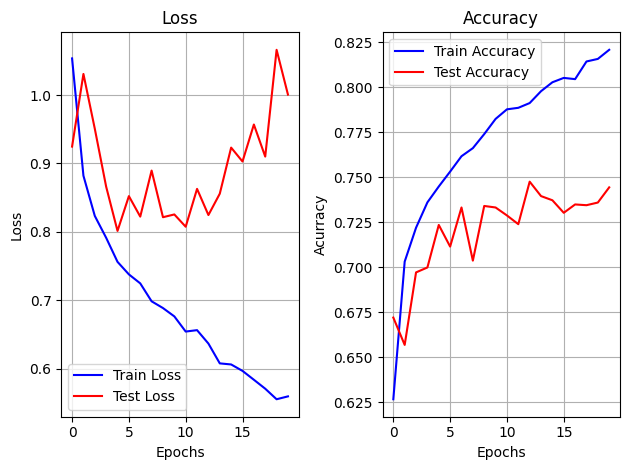

In [ ]:
data.graficaEntrenamiento(train_losses,train_accuracies,test_losses,test_accuracies,epochs=20,nombre="entrenamientoRaza")

In [28]:
NapoleonRaza = MLP(input_size=64*64*3, num_classes=5)
NapoleonRaza.load_state_dict(torch.load('./Modelos/NapoleonRaza.pth'))

<All keys matched successfully>

## Resultados MLP-Napoleon
Para evaluar el modelo vamos a usar las librerías de scikit learn, pues nos permiten de manera rapida calcular las distintas métricas. Sin embargo, es necesario cargar en vectores tanto las etiquetas reales como las etiquetas predichas, por lo que, para este modelo, hemos implementado una funcion llamada "evaluar" que se encargue de ello

In [50]:
generoTotal, generoPredTotal = agente_mlp.evaluar(NapoleonGenero, test_dataloader,etiqueta='genero')
edadTotal, edadPredTotal = agente_mlp.evaluar(NapoleonEdad, test_dataloader,etiqueta='edad')
razaTotal, razaPredTotal = agente_mlp.evaluar(NapoleonRaza, test_dataloader,etiqueta='raza')

In [ ]:
metricasGenero = classification_report(generoTotal, generoPredTotal,target_names=GENERO)
metricasRaza = classification_report(razaTotal, razaPredTotal,target_names=RAZA)
metricasEdad = classification_report(edadTotal, edadPredTotal,target_names=EDADES)

- Genero

              precision    recall  f1-score   support

      Hombre       0.87      0.89      0.88      2483
       Mujer       0.88      0.85      0.86      2259

    accuracy                           0.87      4742
   macro avg       0.87      0.87      0.87      4742
weighted avg       0.87      0.87      0.87      4742



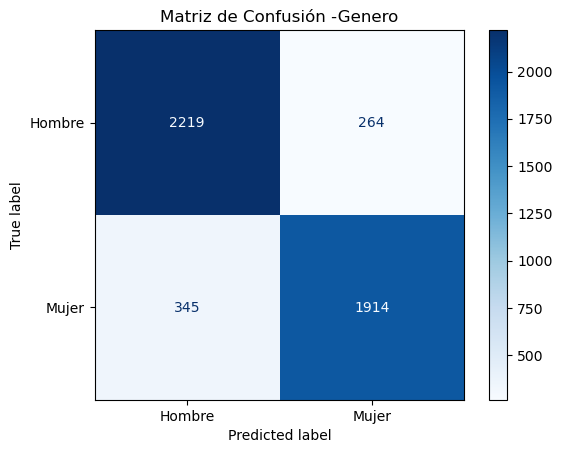

In [55]:
print(metricasGenero)
matrizGenero= confusion_matrix(generoTotal, generoPredTotal)
disp = ConfusionMatrixDisplay(confusion_matrix=matrizGenero,display_labels =GENERO)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión -Genero")
plt.show()

- Edad

              precision    recall  f1-score   support

         0-9       0.84      0.81      0.83       601
       10-19       0.51      0.30      0.38       284
       20-29       0.57      0.75      0.65      1501
       30-39       0.34      0.20      0.25       888
       40-49       0.26      0.37      0.30       466
       50-59       0.34      0.28      0.30       471
       60-69       0.28      0.18      0.22       260
       70-79       0.00      0.00      0.00       137
       80-89       0.22      0.50      0.30       101
       90-99       0.50      0.07      0.12        30
     100-109       0.00      0.00      0.00         1
     110-120       0.00      0.00      0.00         2

    accuracy                           0.48      4742
   macro avg       0.32      0.29      0.28      4742
weighted avg       0.46      0.48      0.46      4742



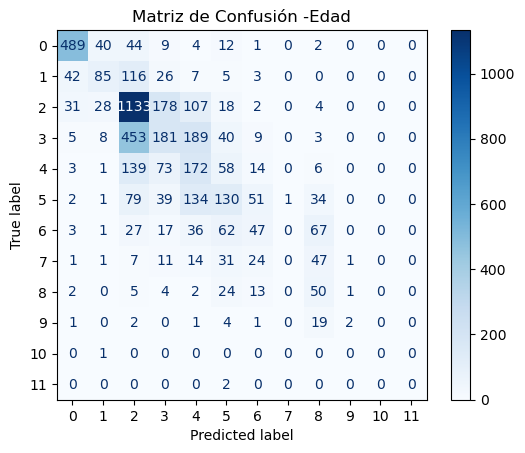

In [57]:
print(metricasEdad)
matrizEdad= confusion_matrix(edadTotal, edadPredTotal)
disp = ConfusionMatrixDisplay(confusion_matrix=matrizEdad)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión -Edad")
plt.show()

- Raza

              precision    recall  f1-score   support

      Blanco       0.80      0.77      0.79      1969
       Negro       0.73      0.86      0.79       892
    Asiático       0.69      0.74      0.71       708
       Indio       0.69      0.70      0.70       835
       Otros       0.33      0.21      0.26       338

    accuracy                           0.73      4742
   macro avg       0.65      0.66      0.65      4742
weighted avg       0.72      0.73      0.72      4742



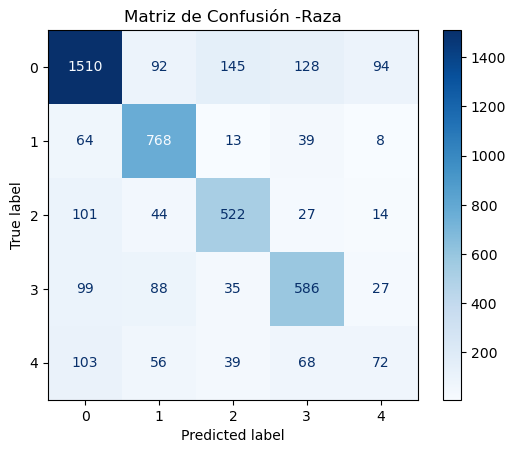

In [59]:
print(metricasRaza)
matrizRaza= confusion_matrix(razaTotal, razaPredTotal)
disp = ConfusionMatrixDisplay(confusion_matrix=matrizRaza)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión -Raza")
plt.show()

# Modelo 3: CNN-Denzel Washington

Implementamos una red convolucional

In [76]:
class DenzelWashington(nn.Module):
    def __init__(self,output_layers):
        super().__init__()

        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv1 = nn.Conv2d(in_channels=3,out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(6, 12, 5)
        self.pool2 = nn.MaxPool2d(4, 4)
       
        self.fc1 = nn.Linear(12 * 11 * 11, 500)
        self.fcout = nn.Linear(500, output_layers)

        self.apply(self._init_weights)  # Aplicar la inicialización de pesos

    def _init_weights(self, m):
        """Inicializa los pesos de la red"""
        if isinstance(m, (nn.Conv2d, nn.Linear)):
            init.normal_(m.weight, mean=0.0, std=0.02)
            if m.bias is not None:
                init.constant_(m.bias, 0)

    def forward(self, x):

        x = self.pool1(x) #3 fotos 100x100
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = torch.flatten(x,1)
        x = F.relu(self.fc1(x))
        x = self.fcout(x)
        return x

Para este modelo solo vamos a normalizar las imagenes

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) #Esto normalizara las imagenes
dataset = data.Dataset(path,transform=transform) #Pasamos las imagenes a la estructura de datos
train_dataloader,test_dataloader = data.entrenamientoTest(dataset=dataset,test_size=0.2,batch_size=4)

In [61]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Entrenando en: {device}")

Entrenando en: cuda


In [ ]:
#Modelo edad
DWEdad = DenzelWashington(output_layers=1).to(device)
mseLoss = nn.MSELoss()

#Modelo Genero
DWGenero = DenzelWashington(output_layers=2).to(device)
entropyLossGen = nn.CrossEntropyLoss()

#Modelo raza
DWRaza = DenzelWashington(output_layers=5).to(device)
entropyLossRaza = nn.CrossEntropyLoss()

agenteDW = agente_cnn.Agente(modeloEdad=DWEdad,
                         modeloGenero=DWGenero,
                         modeloRaza=DWRaza,
                         criterioEdad=mseLoss,
                         criterioGenero=entropyLossGen,
                         criterioRaza=entropyLossRaza,
                         device=device,
                         lr = 0.0001)

- Género (20 epochs)

In [ ]:
train_loss_Genero,train_accuracy_Genero,test_loss_Genero,test_accuracy_Genero = agenteDW.entrenarModelo(train_dataloader,test_dataloader,"Genero",num_epochs=20)
torch.save(agenteDW.modeloGenero.state_dict(), './/Modelos//DWGenero.pth')
#17 mins

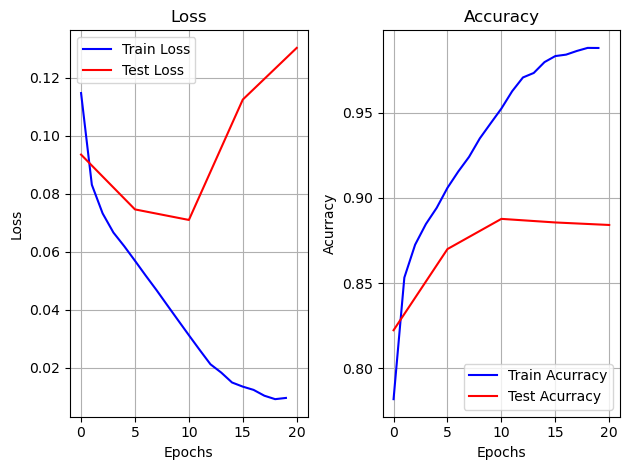

In [ ]:
data.graficaEntrenamiento(train_loss_Genero,train_accuracy_Genero,test_loss_Genero,test_accuracy_Genero,epochs= 20,nombre="entrenamientoGeneroDW")

- Edad (150 epochs)

In [ ]:
train_loss_Edad,train_accuracy_Edad,test_loss_Edad,test_accuracy_Edad = agenteDW.entrenarModelo(train_dataloader,test_dataloader,"Edad",num_epochs=150)
torch.save(agenteDW.modeloEdad.state_dict(), './/Modelos//DWEdad.pth')
#2 horas

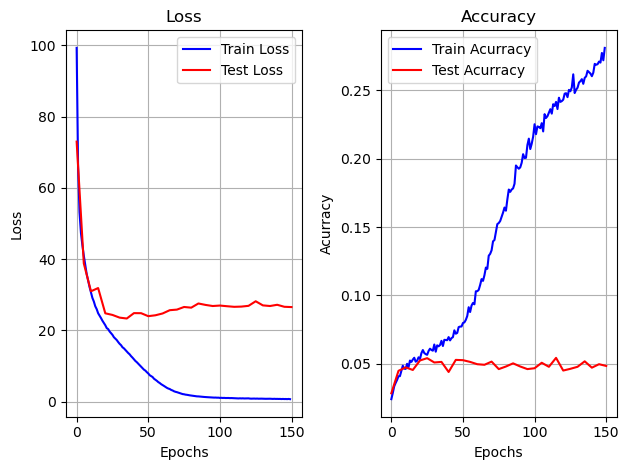

In [ ]:
data.graficaEntrenamiento(train_loss_Edad,train_accuracy_Edad,test_loss_Edad,test_accuracy_Edad,epochs=150,nombre="entrenamientoEdadDW")

- Raza: 30 epochs

In [ ]:
train_loss_Raza,train_accuracy_Raza,test_loss_Raza,test_accuracy_Raza = agenteDW.entrenarModelo(train_dataloader,test_dataloader,"Raza",num_epochs=30)
torch.save(agenteDW.modeloRaza.state_dict(), './/Modelos//DWRaza.pth')
#25 mins

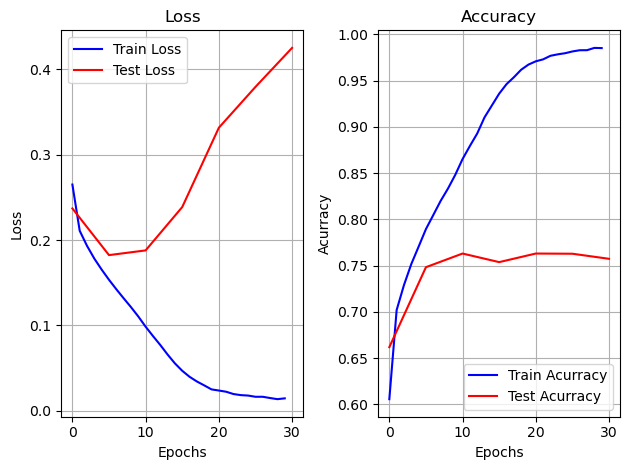

In [ ]:
data.graficaEntrenamiento(train_loss_Raza,train_accuracy_Raza,test_loss_Raza,test_accuracy_Raza,epochs=30,nombre="entrenamientoRazaDW")

In [78]:
agenteDW.modeloEdad.load_state_dict(torch.load('./Modelos/DWEdad3.pth'))
agenteDW.modeloGenero.load_state_dict(torch.load('./Modelos/DWGenero3.pth'))
agenteDW.modeloRaza.load_state_dict(torch.load('./Modelos/DWRaza3.pth'))

<All keys matched successfully>

## Resultados CNN-Denzel Washington

Como hemos comentado antes, al usar las librerías de Scikit learn es necesario cargar los datos en vectores: definimos la funcion "resultados"

In [82]:
edadesTotal,edadesPredTotal,generosTotal,generosPredTotal,razasTotal,razasPredTotal = agenteDW.resultados(test_dataloader)

- Genero

              precision    recall  f1-score   support

      Hombre       0.89      0.89      0.89      2483
       Mujer       0.88      0.88      0.88      2259

    accuracy                           0.88      4742
   macro avg       0.88      0.88      0.88      4742
weighted avg       0.88      0.88      0.88      4742



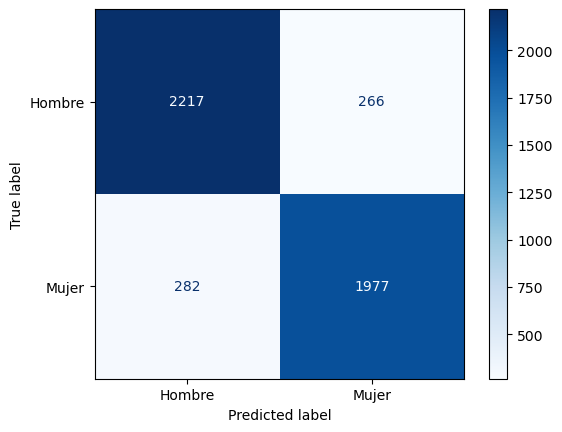

In [96]:
metricasGenero = classification_report(generosTotal, generosPredTotal,target_names=GENERO)
print(metricasGenero)
matrizGenero = confusion_matrix(generosTotal, generosPredTotal)
disp = ConfusionMatrixDisplay(confusion_matrix=matrizGenero,display_labels=GENERO)
disp.plot(cmap = plt.cm.Blues)
plt.show()

- Edad

In [85]:
print("Tasa de aciertos de la red en EDAD: ",accuracy_score(edadesTotal, edadesPredTotal)*100, "%")

Tasa de aciertos de la red en EDAD:  4.8291859974694225 %


El modelo no es capaz de determinar la edad exacta ¿ pero cuanto se equivoca? Error absoluto medio 

In [86]:
print(f'Error absoluto medio(Edad): {mean_absolute_error(edadesTotal, edadesPredTotal)}')

Error absoluto medio(Edad): 7.564318852804724


- Raza

              precision    recall  f1-score   support

      Blanco       0.80      0.83      0.82      1969
       Negro       0.80      0.82      0.81       892
    Asiático       0.85      0.75      0.80       708
       Indio       0.66      0.74      0.70       835
       Otros       0.40      0.29      0.34       338

    accuracy                           0.76      4742
   macro avg       0.70      0.69      0.69      4742
weighted avg       0.76      0.76      0.76      4742



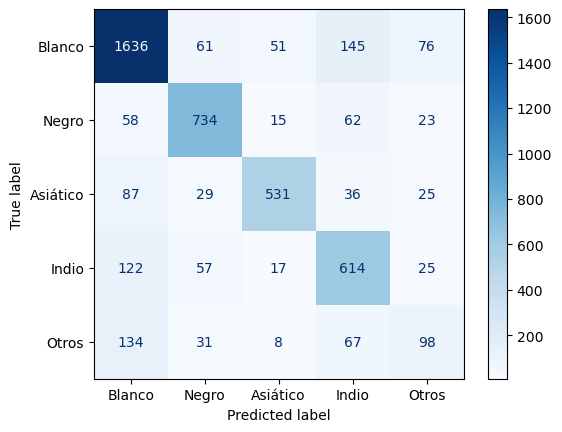

In [87]:
metricasRaza = classification_report(razasTotal, razasPredTotal,target_names=RAZA)
print(metricasRaza)
matrizRaza = confusion_matrix(razasTotal, razasPredTotal)
disp = ConfusionMatrixDisplay(confusion_matrix=matrizRaza,display_labels=RAZA)
disp.plot(cmap = plt.cm.Blues)
plt.show()


# Modelo 4: CNN-Lola Lolita
Modelo de red convolucional mas complejo que el anterior

In [88]:
class LolaLolita(nn.Module):
    def __init__(self,output_layers):
        super().__init__()

        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv1 = nn.Conv2d(in_channels=3,out_channels=6, kernel_size=3)
        self.conv2 = nn.Conv2d(6, 12, 4)
        self.conv3 = nn.Conv2d(12,24,6)
        self.conv4 =  nn.Conv2d(24,48,16)
        self.pool2 = nn.MaxPool2d(3, 3)
       
        self.fc1 = nn.Linear(48 * 100, 1200)
        self.fc2 = nn.Linear(1200, 850)
        self.fcout = nn.Linear(850, output_layers)

        self.apply(self._init_weights)  # Aplicar la inicialización de pesos

    def _init_weights(self, m):
        """Inicializa los pesos de la red"""
        if isinstance(m, (nn.Conv2d, nn.Linear)):
            init.normal_(m.weight, mean=0.0, std=0.02)
            if m.bias is not None:
                init.constant_(m.bias, 0)

    def forward(self, x):

        x = self.pool1(x) 
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.pool1(F.relu(self.conv3(x)))
        x = self.pool2(F.relu(self.conv4(x)))
        x = torch.flatten(x,1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fcout(x)
        return x

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Entrenando en: {device}")

In [ ]:
#Modelo edad
LLEdad = LolaLolita(output_layers=1).to(device)
mseLoss = nn.MSELoss()

#Modelo Genero
LLGenero = LolaLolita(output_layers=2).to(device)
entropyLossGen = nn.CrossEntropyLoss()

#Modelo raza
LLRaza = LolaLolita(output_layers=5).to(device)
entropyLossRaza = nn.CrossEntropyLoss()

agenteLL= agente_cnn.Agente(modeloEdad=LLEdad,
                         modeloGenero=LLGenero,
                         modeloRaza=LLRaza,
                         criterioEdad=mseLoss,
                         criterioGenero=entropyLossGen,
                         criterioRaza=entropyLossRaza,
                         device=device,
                         lr = 0.00001)

- Género (30 epochs)

In [ ]:
train_loss_Genero,train_accuracy_Genero,test_loss_Genero,test_accuracy_Genero = agenteLL.entrenarModelo(train_dataloader,test_dataloader,"Genero",num_epochs=30)
torch.save(agenteLL.modeloGenero.state_dict(), './/Modelos//LLGenero.pth')
#40 mins

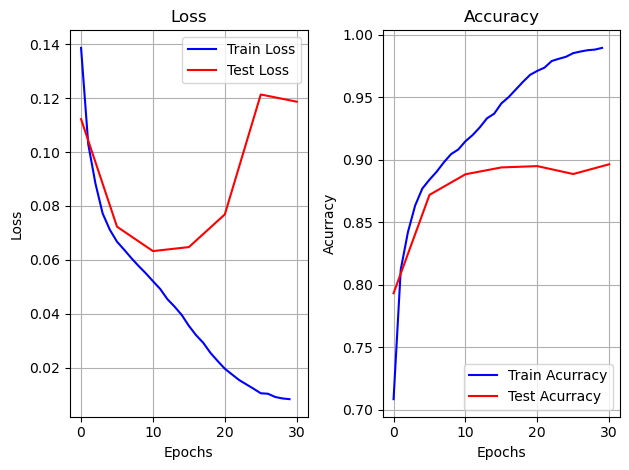

In [ ]:
data.graficaEntrenamiento(train_loss_Genero,train_accuracy_Genero,test_loss_Genero,test_accuracy_Genero,epochs=30,nombre="entrenamientoGeneroLL")

- Edad (100 epochs)

In [ ]:
train_loss_Edad,train_accuracy_Edad,test_loss_Edad,test_accuracy_Edad = agenteLL.entrenarModelo(train_dataloader,test_dataloader,"Edad",num_epochs=100)
torch.save(agenteLL.modeloEdad.state_dict(), './/Modelos//LLEdad.pth')
#3 horas

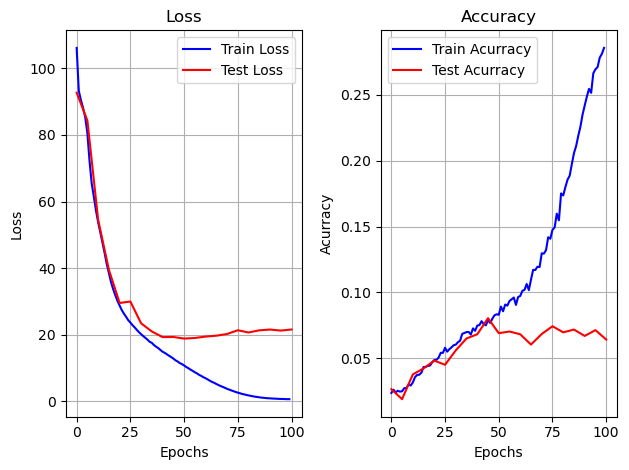

In [ ]:
data.graficaEntrenamiento(train_loss_Edad,train_accuracy_Edad,test_loss_Edad,test_accuracy_Edad,epochs=100,nombre="entrenamientoEdadLL")

- Raza (30 epochs)

In [ ]:
train_loss_Raza,train_accuracy_Raza,test_loss_Raza,test_accuracy_Raza = agenteLL.entrenarModelo(train_dataloader,test_dataloader,"Raza",num_epochs=30)
torch.save(agenteLL.modeloRaza.state_dict(), './/Modelos//LLRaza.pth')
#45 mins

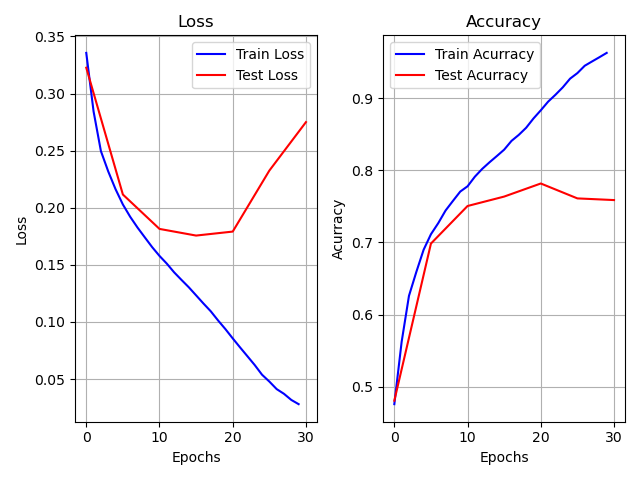

In [ ]:
data.graficaEntrenamiento(train_loss_Edad,train_accuracy_Edad,test_loss_Edad,test_accuracy_Edad,epochs=30,nombre="entrenamientoRazaLL")

In [93]:
agenteLL.modeloEdad.load_state_dict(torch.load('./Modelos/LLEdad.pth'))
agenteLL.modeloGenero.load_state_dict(torch.load('./Modelos/LLGenero.pth'))
agenteLL.modeloRaza.load_state_dict(torch.load('./Modelos/LLRaza.pth'))

<All keys matched successfully>

## Resultados CNN-Lola Lolita

In [94]:
edades,edadesPred,generos,generosPred,razas,razasPred = agenteLL.resultados(test_dataloader)

- Genero

              precision    recall  f1-score   support

      Hombre       0.92      0.88      0.90      2483
       Mujer       0.87      0.92      0.89      2259

    accuracy                           0.90      4742
   macro avg       0.90      0.90      0.90      4742
weighted avg       0.90      0.90      0.90      4742



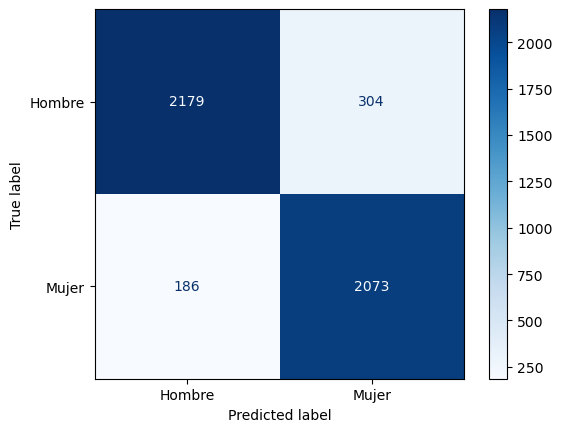

In [103]:
metricasGenero = classification_report(generos, generosPred,target_names=GENERO)
print(metricasGenero)
matrizGenero = confusion_matrix(generos, generosPred)
disp = ConfusionMatrixDisplay(confusion_matrix=matrizGenero,display_labels=GENERO)
disp.plot(cmap = plt.cm.Blues)
plt.show()

- Edad

In [100]:
print("Tasa de aciertos de la red en EDAD: ",accuracy_score(edades, edadesPred)*100, "%")
print(f'Error absoluto medio(Edad): {mean_absolute_error(edades, edadesPred)}')

Tasa de aciertos de la red en EDAD:  7.001265288907634 %
Error absoluto medio(Edad): 6.655208772669759


- Raza

              precision    recall  f1-score   support

      Blanco       0.83      0.80      0.81      1969
       Negro       0.82      0.80      0.81       892
    Asiático       0.76      0.84      0.80       708
       Indio       0.69      0.73      0.71       835
       Otros       0.33      0.30      0.31       338

    accuracy                           0.76      4742
   macro avg       0.69      0.69      0.69      4742
weighted avg       0.76      0.76      0.76      4742



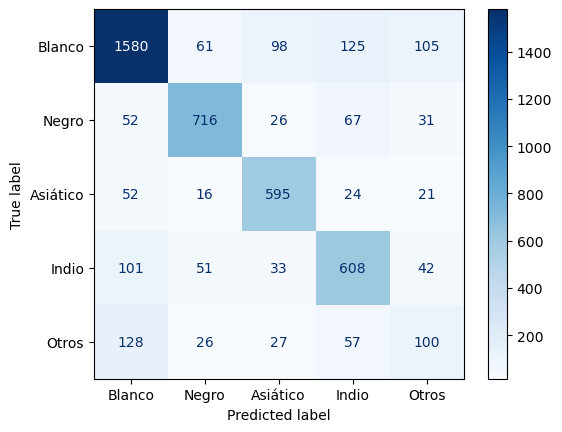

In [102]:
metricasRaza = classification_report(razas, razasPred,target_names=RAZA)
print(metricasRaza)
matrizRaza = confusion_matrix(razas, razasPred)
disp = ConfusionMatrixDisplay(confusion_matrix=matrizRaza,display_labels=RAZA)
disp.plot(cmap = plt.cm.Blues)
plt.show()

# Resultados Generales

Vamos a coger unas fotos del conjunto de test y ver como se comportan los distintos modelos

In [109]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) #Esto normalizara las imagenes
dataset = data.Dataset(path,transform=transform) #Pasamos las imagenes a la estructura de datos
train_dataloader,test_dataloader = data.entrenamientoTest(dataset=dataset,test_size=0.2,batch_size=8)

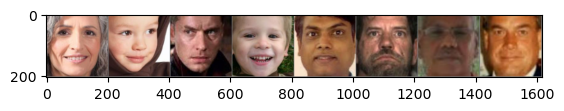

In [110]:
imagenes, edades,generos,razas = next(iter(test_dataloader))
data.mostrarImg(imagenes)